In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
df= pd.read_csv('auto.csv', header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# convert '?' to NaN using replace(A,B, inplace=True)


In [4]:
df.replace('?',np.NaN,inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Evaluating for missing data
### using 2 methods:
####  isnull() - notnull()


In [5]:
missing_data=df.isnull()
missing_data.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Count missing values in each column
### using method: value_counts() to counts the number of "False" values and the number of "True" values


In [6]:
for column in missing_data.columns.values.tolist():
    if all(missing_data[column]==False):
        pass
    else:
        print(column)
        print(missing_data[column].value_counts())
        print("")    

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

bore
False    201
True       4
Name: bore, dtype: int64

stroke
False    201
True       4
Name: stroke, dtype: int64

horsepower
False    203
True       2
Name: horsepower, dtype: int64

peak-rpm
False    203
True       2
Name: peak-rpm, dtype: int64

price
False    201
True       4
Name: price, dtype: int64



# deal with missing data
### 1. Replace by mean 

In [7]:
nor_mean=df['normalized-losses'].astype(float).mean()
df['normalized-losses'].replace(np.NaN,nor_mean,inplace=True)

stroke_avg=df['stroke'].astype(float).mean()
df['stroke'].replace(np.NaN,stroke_avg,inplace=True)

bore_avg=df['bore'].astype(float).mean()
df['bore'].replace(np.NaN,bore_avg,inplace=True)

avg_horsePower=df['horsepower'].astype(float).mean()
df['horsepower'].replace(np.NaN,avg_horsePower,inplace=True)

avg_rpm=df['peak-rpm'].astype(float).mean()
df['peak-rpm'].replace(np.NaN,avg_rpm,inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2. Replace by frequency:

In [8]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [9]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [10]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3.Drop the whole row: 
#### (axis=0 with row & axis =1 with column)

In [11]:
df.dropna(subset=['price'],axis=0,inplace=True)
# we need to reset index with method reset_index beacuse we droped 2 rows
df.reset_index(drop=True,inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Correct data format
### 1. check the data type with dtypes:

In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### 2. change the data type with astype():

In [13]:
df[['bore','stroke','horsepower']]=df[['bore','stroke','horsepower']].astype(float)
df[['normalized-losses']]=df[['normalized-losses']].astype(int)
df[['price']]=df[['price']].astype(float)
df[['peak-rpm']]=df[['peak-rpm']].astype(float)
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardizantion

### Transform mpg to L/100km
#### L/100Km = 235/ mpg

In [14]:
df['city-L/100km']=235/df['city-mpg']
# df['highway-mpg']=235/df['highway-mpg']
# df.rename(columns={'highway-mpg':'highway-L/100km'},inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


## Data Normalization
### 1. Simple feature scaling: Xnew=Xold/Xmax


In [15]:
df[['length','width','height']].head(5)

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [16]:
df['length']=df['length']/df['length'].max()
# df['width']=df['width']/df['width'].max()
# df['height']=df['height']/df['height'].max()
df[['length','width','height']].head(5)

,length,width,height
0,0.811148,64.1,48.8
1,0.811148,64.1,48.8
2,0.822681,65.5,52.4
3,0.848630,66.2,54.3
4,0.848630,66.4,54.3


### 2. Min-Max: Xnew=(Xold-Xmin)/(Xmax-Xmin)

In [17]:
df['width']=(df['width']-df['width'].min())/(df['width'].max()-df['width'].min())
df['width'].head(5)

0    0.324786
1    0.324786
2    0.444444
3    0.504274
4    0.521368
Name: width, dtype: float64

In [18]:
df['height'].mean()

53.766666666666666

### 3. Z-score: Xnew=(X-.mean())/.std()

In [19]:
df['height']=(df['height']-df['height'].mean())/df['height'].std()
df['height'].head(5)

0   -2.029015
1   -2.029015
2   -0.558319
3    0.217881
4    0.217881
Name: height, dtype: float64

## Binning 

Text(0, 0.5, 'count')

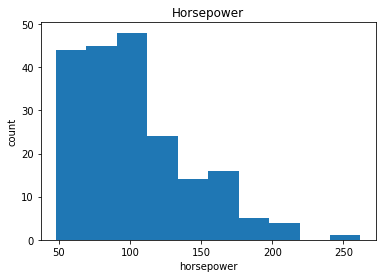

In [20]:
%matplotlib inline
plt.hist(df['horsepower'])
plt.title('Horsepower')
plt.xlabel('horsepower')
plt.ylabel('count')

In [21]:
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [22]:
group_names=['low','midium','high']
df['Horsepower_bins']=pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)
df[['horsepower','Horsepower_bins']].head(5)

,horsepower,Horsepower_bins
0,111.0,low
1,111.0,low
2,154.0,midium
3,102.0,low
4,115.0,low


In [23]:
df['Horsepower_bins'].value_counts()

low       153
midium     43
high        5
Name: Horsepower_bins, dtype: int64

Text(0.5, 1.0, 'Horsepower_Bins')

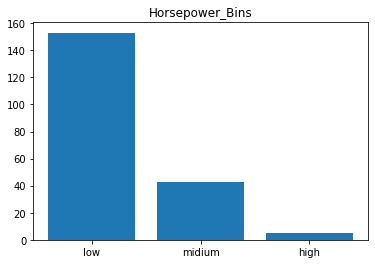

In [24]:
plt.bar(group_names, df['Horsepower_bins'].value_counts())
plt.title("Horsepower_Bins")

## Bins Visualization

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

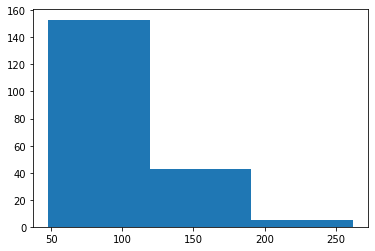

In [25]:
plt.hist(df['horsepower'],bins=3)

## Indicator Variable(or dummy Variable)

In [26]:
dummy_variable_1=pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
df['aspiration'].head(5)

0    std
1    std
2    std
3    std
4    std
Name: aspiration, dtype: object

In [28]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_variable_1.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Merge data frame 'df' and 'dummy_variable_1'

In [29]:
df=pd.concat([df,dummy_variable_1],axis=1)
df.drop('fuel-type',axis=1,inplace=True)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,Horsepower_bins,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,midium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,low,0,1


In [30]:
dummy_asp=pd.get_dummies(df['aspiration'])
dummy_asp.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
df=pd.concat([df,dummy_asp],axis=1)
df.drop('aspiration',axis=1,inplace=True)
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,Horsepower_bins,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.324786,...,5000.0,21,27,13495.0,11.190476,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.324786,...,5000.0,21,27,16500.0,11.190476,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.444444,...,5000.0,19,26,16500.0,12.368421,midium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.504274,...,5500.0,24,30,13950.0,9.791667,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.521368,...,5500.0,18,22,17450.0,13.055556,low,0,1,1,0


In [31]:
df.to_csv('Clean_dt.csv')

In [32]:
# df[['length','compression-ratio']].describe(include='all')

## calculate the correlation between variables of the types in64 or float64  using method corr()

In [33]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


## continuous numerical variables:(using regplot)
### 1- positive linear relationship:

(0.0, 53617.015550168464)

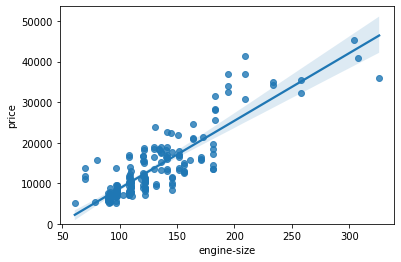

In [34]:
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

In [35]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

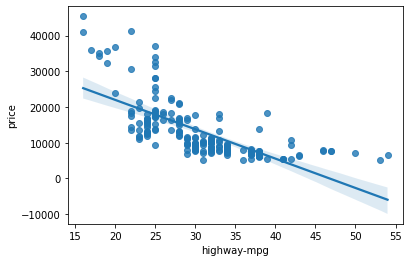

In [36]:
sns.regplot(x='highway-mpg',y='price',data=df)

In [37]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### 2-Weak linear relationship:

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

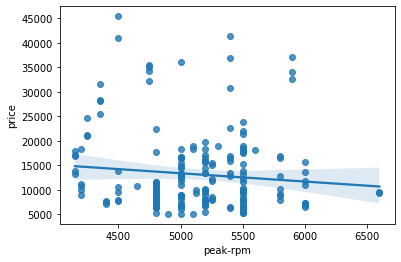

In [38]:
sns.regplot(x='peak-rpm',y='price',data=df)

In [39]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [40]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


## Categorical variables:(using boxplot)

In [41]:
df[['body-style']].head(5)

,body-style
0,convertible
1,convertible
2,hatchback
3,sedan
4,sedan


<AxesSubplot:xlabel='body-style', ylabel='price'>

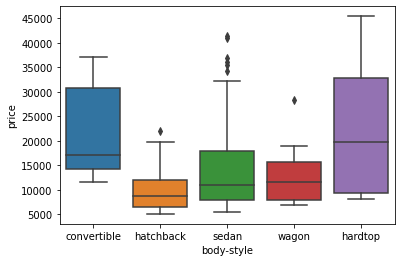

In [42]:
sns.boxplot(x='body-style',y='price',data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

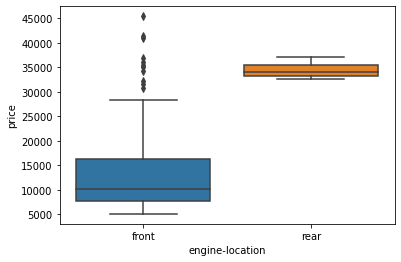

In [43]:
sns.boxplot(x='engine-location',y='price',data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

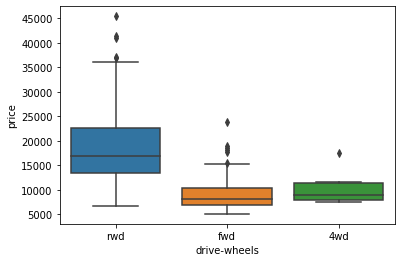

In [44]:
sns.boxplot(x='drive-wheels',y='price',data=df)

## Descriptive Statistical Analysis:

In [45]:
df.describe()
df.describe(include='all')
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [46]:
drive_wheels_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [47]:
engine_loc_counts=df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'},inplace=True)
engine_loc_counts.index.name='engine_location'
engine_loc_counts

,value_counts
engine_location,
front,198
rear,3


## GroupBy

In [48]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [49]:
drive_wheels_group=df[['drive-wheels','price']].groupby('drive-wheels',as_index=False).mean()
drive_wheels_group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### 1- if as_index=False(default), using pivot() method to convert pivot table

In [50]:
drive_wheels_style_group1=df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
drive_wheels_style_group1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [51]:
group_pivot=drive_wheels_style_group1.pivot(index='drive-wheels',columns='body-style')
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### 2- if as_index=True(default), using unstack() method to convert pivot table

In [52]:
drive_wheels_style_group2=df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=True).mean()
drive_wheels_style_group2

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

In [53]:
group_pivot=drive_wheels_style_group2.unstack()
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [54]:
group_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [55]:
group_pivot.shape

(3, 5)

In [56]:
group_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

## Heatmap: 

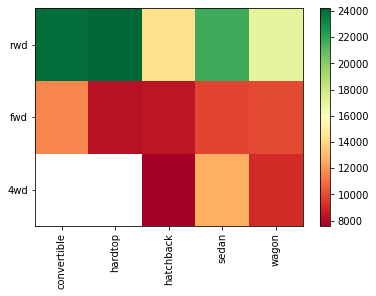

In [57]:
fig, ax=plt.subplots()
im=ax.pcolor(group_pivot,cmap='RdYlGn')

row_label=group_pivot.columns.levels[1]
col_label=group_pivot.index

ax.set_xticks(np.arange(group_pivot.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0])+0.5,minor=False)


ax.set_xticklabels(row_label,minor=False)
ax.set_yticklabels(col_label,minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)

plt.show()

## Correction and Causation:
### correction coefficient and P-value
#### using method PEARSONR()


In [58]:
# pearson correction coefficient 
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [59]:
from scipy import stats

### wheel-base

In [60]:
pearson_coef, p_value =stats.pearsonr(df['wheel-base'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.584641822265508  and P_value=  8.076488270733218e-20


### horsepower

In [61]:
pearson_coef, p_value =stats.pearsonr(df['horsepower'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.8095745670036559  and P_value=  6.369057428260101e-48


### length

In [62]:
pearson_coef, p_value =stats.pearsonr(df['length'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.6906283804483639  and P_value=  8.016477466159328e-30


### Width

In [63]:
pearson_coef, p_value =stats.pearsonr(df['width'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.7512653440522672  and P_value=  9.20033551048217e-38


### curb-weight

In [64]:
pearson_coef, p_value =stats.pearsonr(df['curb-weight'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.8344145257702843  and P_value=  2.189577238894065e-53


### engine-size

In [65]:
pearson_coef, p_value =stats.pearsonr(df['engine-size'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.8723351674455182  and P_value=  9.265491622200232e-64


### Bore

In [66]:
pearson_coef, p_value =stats.pearsonr(df['bore'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  0.5431553832626603  and P_value=  8.049189483935261e-17


### highway-mpg

In [67]:
pearson_coef, p_value =stats.pearsonr(df['highway-mpg'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  -0.704692265058953  and P_value=  1.7495471144476358e-31


### city-mpg

In [68]:
pearson_coef, p_value =stats.pearsonr(df['city-mpg'],df['price'])
print('the Pearson Correlation Coefficient is ',pearson_coef, ' and P_value= ',p_value)

the Pearson Correlation Coefficient is  -0.6865710067844678  and P_value=  2.321132065567641e-29


## Analysis of variance
### F-test score and P-value
#### If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

In [69]:
df_gptest=df[['drive-wheels','body-style','price']]
df_gptest.head(5)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [70]:
group_test=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
group_test.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [71]:
group_test.get_group('4wd')

,drive-wheels,price
4,4wd,17450.0
136,4wd,7603.0
140,4wd,9233.0
141,4wd,11259.0
144,4wd,8013.0
145,4wd,11694.0
150,4wd,7898.0
151,4wd,8778.0


### using f_oneway() to ANOVA


In [72]:
#ANOVA
f_val,p_val= stats.f_oneway(group_test.get_group('fwd')['price'],
                            group_test.get_group('rwd')['price'], group_test.get_group('4wd')['price'])
print("ANOVA results: F= ", f_val, " P= ",p_val)

ANOVA results: F=  67.95406500780399  P=  3.3945443577151245e-23


In [73]:
#ANOVA
f_val,p_val= stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('rwd')['price'])
print("ANOVA results: F= ", f_val, " P= ",p_val)

ANOVA results: F=  130.5533160959111  P=  2.2355306355677845e-23


In [74]:
#ANOVA
f_val,p_val= stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('4wd')['price'])
print("ANOVA results: F= ", f_val, " P= ",p_val)

ANOVA results: F=  0.6654657502523033  P=  0.41620116697845666


In [75]:
#ANOVA
f_val,p_val= stats.f_oneway(group_test.get_group('rwd')['price'],group_test.get_group('4wd')['price'])
print("ANOVA results: F= ", f_val, " P= ",p_val)

ANOVA results: F=  8.580681368924756  P=  0.004411492211225333


In [76]:
group_test.count()

,price
drive-wheels,
4wd,8
fwd,118
rwd,75


## Simple Linear Regression:
### the predict(independent) variable X
### the targer ( dependent) variable Y     Yhat=a+bX

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm= LinearRegression()
X=df[['highway-mpg']]
Y=df[['price']]
lm.fit(X,Y)

LinearRegression()

In [79]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [80]:
lm.intercept_

array([38423.30585816])

In [81]:
lm.coef_

array([[-821.73337832]])

## Multiple Linear Regression

In [82]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm.fit(Z,df['price'])
lm.predict(Z)[1:5]

array([13699.11161184, 19051.65470233, 10620.36193015, 15521.31420211])

In [83]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [84]:
lm.intercept_

-15806.62462632923

## Model Evaluation using Visualization
### 1. Regression Plot

(0.0, 48170.47573003768)

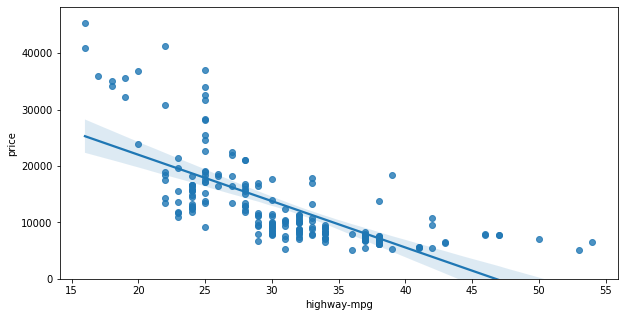

In [85]:
plt.figure(figsize=(10,5))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

In [86]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Residual:
#### residplot()

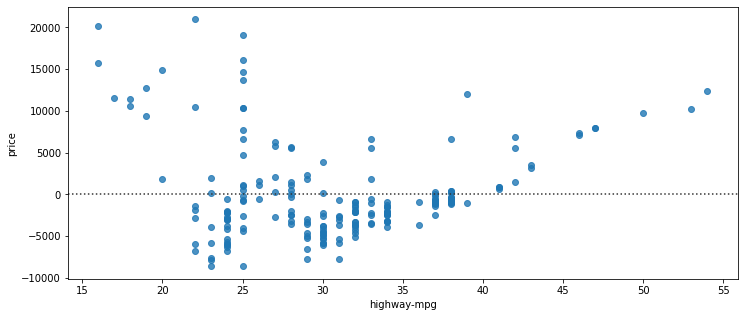

In [87]:
plt.figure(figsize=(12,5))
sns.residplot(x=df['highway-mpg'],y=df['price'],data=df)
plt.show()

## Distribution plot( for multiple regression linear)

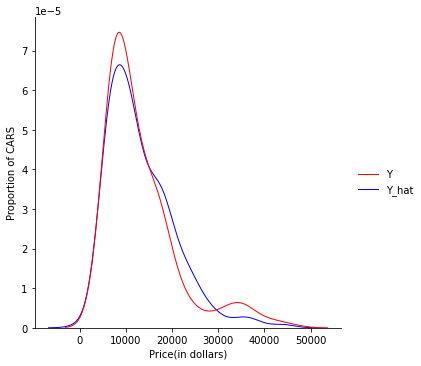

In [88]:
Y_hat=lm.predict(Z)

# plt.figure(figsize=(12,10))

# ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
# sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

# plt.title('Actual vs Fitted Values for Price')
# plt.xlabel('Price (in dollars)')
# plt.ylabel('Proportion of Cars')

# plt.show()

g=sns.displot(
    {"Y": df['price'], "Y_hat": Y_hat}, # Use a dict to assign labels to each curve
    kind="kde",
    common_norm=False,  # Normalize each distribution independently
    palette=["red", "blue"],  # Use palette for multiple colors
    linewidth=1
)
g.set_axis_labels("Price(in dollars)", "Proportion of CARS")
g.set_titles("Actual vs Fitted Values for Price")


## Polynomial Resgression

In [89]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf() - trả về hình hiện tại
# ax = fig.gca() trả về các trục hiện tại
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new,'-')
    plt.title('Polynomial Fit with matplotlib for Price ~ Length')
#     ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
#     fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()
x=df['highway-mpg']
y=df['price']

f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


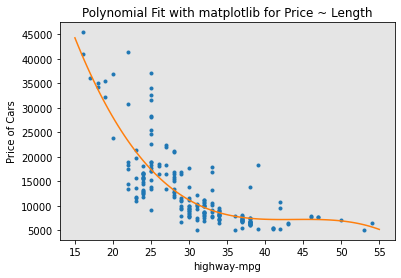

In [90]:
PlotPolly(p,x,y,'highway-mpg')

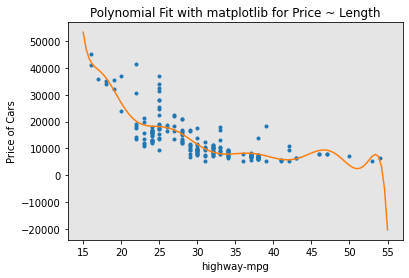

In [91]:
f=np.polyfit(x,y,11)
p=np.poly1d(f)
PlotPolly(p,x,y,'highway-mpg')

### Polynomial with 2 variables:

In [92]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [93]:
Z_pr=pr.fit_transform(Z)
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [94]:
Z.shape

(201, 4)

In [95]:
Z_pr.shape

(201, 15)

## Pipeline: 

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [97]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [98]:
Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 2 Steps

In [99]:
Input1=[('scale',StandardScaler()),('model',LinearRegression())]
pipe1=Pipeline(Input1)
pipe1.fit(Z,y)
pipe1.predict(Z)[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measure for In-Sample Evaluation: 
## 1- Mean squared error (MSE): 
<b>the model with the smallest MSE value is a better fit</b> for the data. <b>.mean_squared_error(df[''],Yhat)</b>
## 2- R-Squared(R^2): 
<b>the model with the higher R-squared value is a better fit</b> for the data. <b>.score()</b>

### Model 1: Simple Linear Regression (SMR)
#### 1- R^2

In [100]:
lm.fit(X,Y)
print('the R-square is: ', lm.score(X,Y))

the R-square is:  0.4965911884339176


#### 2- MSE

In [101]:
y_predect_simpl=lm.predict(X)

from sklearn.metrics import mean_squared_error
mse_simpl=mean_squared_error(df['price'],y_predect_simpl)
print('The mean square error of price and predicted value is: ',mse_simpl)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression (MLR)
#### 1- R^2

In [102]:
lm.fit(Z,Y)
print('The R square is: ',lm.score(Z,Y))

The R square is:  0.8093562806577457


#### 2- MSE

In [103]:
y_predict_multi=lm.predict(Z)

mse_multi=mean_squared_error(Y,y_predict_multi)
print('The mean square error of price is: ', mse_multi)

The mean square error of price is:  11980366.87072649


### Model 3: Polynomial Fit
#### 1- R^2

In [104]:
x=df['highway-mpg']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)

In [105]:
from sklearn.metrics import r2_score
r_quared=r2_score(y,p(x))
print('The R-square value is:',r_quared)

The R-square value is: 0.674194666390652


#### 2- MSE

In [106]:
mse_poly=mean_squared_error(Y,p(x))
print('The mean square error of price is: ',mse_poly)

The mean square error of price is:  20474146.426361218


### Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. 

# Prediction

In [107]:
new_input=np.arange(1,100,1).reshape(-1,1)

lm.fit(X,Y)
yhatpred=lm.predict(new_input)
yhatpred[0:10]

C:\Users\nopud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655],
       [33492.90558823],
       [32671.1722099 ],
       [31849.43883158],
       [31027.70545326],
       [30205.97207494]])

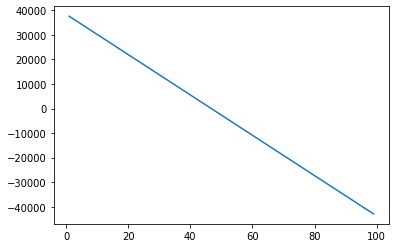

In [108]:
plt.plot(new_input,yhatpred)
plt.show()

In [109]:
Z.head(5)

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


# Model Evaluation And Refinement

In [110]:
from ipywidgets import interact, interactive, fixed, interact_manual

## Function for Plotting

In [111]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(12,5))
    ax1=sns.kdeplot(RedFunction, color='r',label=RedName)
    ax2=sns.kdeplot(BlueFunction, color='b', label=BlueName,ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price(in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()


In [112]:
def PollyPlot(xtrain,xtest,ytrain, ytest, lr, poly_transform):
    plt.figure(figsize=(12,5))
    
    xmax=max([xtrain.values.max(),xtest.values.max()])
    xmin=min([xtrain.values.min(),xtest.values.min()])
    
    x= np.arange(xmin,xmax,0.1)
    
    plt.plot(xtrain,ytrain, 'ro', label='Training Data')
    plt.plot(xtest,ytest, 'go', label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label ='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()
    
    

## Training and Testing

In [113]:
df=df._get_numeric_data()
y_data=df['price']
x_data=df.drop('price',axis=1)

In [114]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.10,random_state=1)

print('number of test samples:', xtest.shape[0])
print('number of training samples:', xtrain.shape[0])

number of test samples: 21
number of training samples: 180


In [115]:
lr=LinearRegression()

lr.fit(xtrain[['horsepower']],ytrain)

# calculate R^2

lr.score(xtest[['horsepower']],ytest)


0.36358755750788263

In [116]:
lr.score(xtrain[['horsepower']],ytrain)

0.6619724197515104

## Cross-validation Score

In [117]:
from sklearn.model_selection import cross_val_score
Rcross= cross_val_score(lr, x_data[['horsepower']],y_data,cv=4)

Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [118]:
print ('the mean of the fold are ',Rcross.mean(), " and the dtandard deviation is ",Rcross.std())

the mean of the fold are  0.522009915042119  and the dtandard deviation is  0.2911839444756029


In [119]:
-1*cross_val_score(lr,x_data[['horsepower']],y_data,cv=4,scoring="neg_mean_squared_error")

array([20254142.84026703, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [120]:
from sklearn.model_selection import cross_val_predict

In [121]:
yhat=cross_val_predict(lr,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting

In [122]:
lr=LinearRegression()
lr.fit(xtrain[['horsepower','curb-weight','engine-size','highway-mpg']],ytrain)

# Predict using training data:
yhat_train=lr.predict(xtrain[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [123]:
# Predict using testing data:

yhat_test=lr.predict(xtest[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

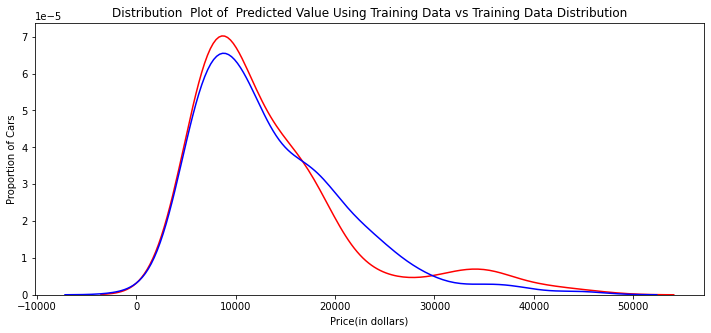

In [124]:
# Using matplotlib to plot

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(ytrain, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

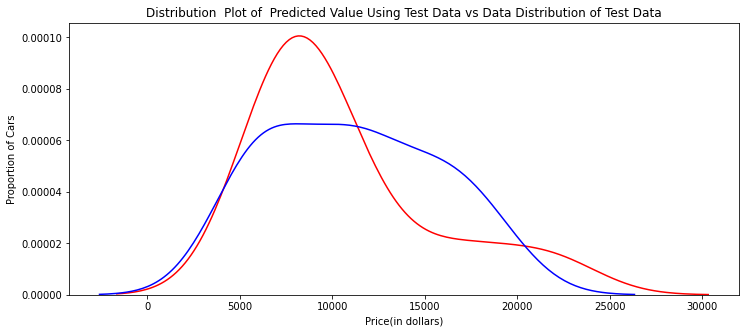

In [125]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## polyminal overfitting

In [126]:
x_train,x_test,y_train,y_test= train_test_split(x_data,y_data, test_size=0.45, random_state=0)

pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [127]:
poly= LinearRegression()
poly.fit(x_train_pr,y_train)

yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65555073,  7307.98775566, 12213.78765563, 18893.2481651 ,
       19995.95210345])

In [128]:
print('Predicted values:',yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [ 6728.65555073  7307.98775566 12213.78765563 18893.2481651 ]
True values: [ 6295. 10698. 13860. 13499.]


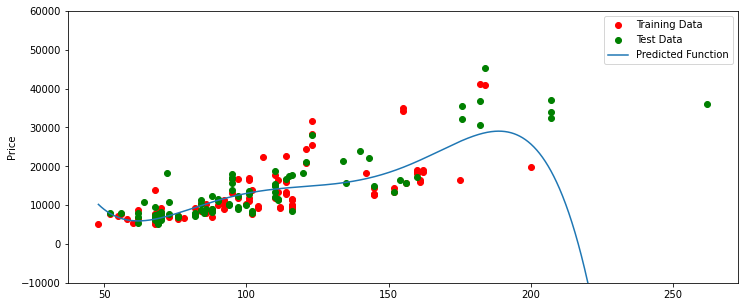

In [129]:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train, y_test, poly,pr)

In [130]:
#R^2 of the training data:
poly.score(x_train_pr,y_train)

0.5567716902118552

In [131]:
#R^2 of the test data:
poly.score(x_test_pr,y_test)

-29.871339903340107

Text(3, 0.75, 'Maximum R^2')

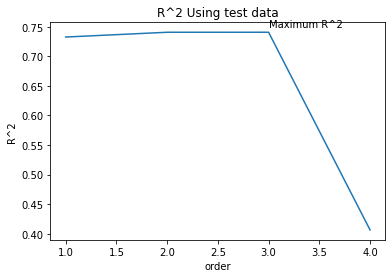

In [132]:
Rsqu_test=[]
order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr,y_train)
    
    Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using test data')
plt.text(3,0.75,'Maximum R^2')

In [133]:
def f(order,test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=test_data, random_state=0)
    pr= PolynomialFeatures(degree=order)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    
    poly= LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train, y_test, poly , pr)

In [134]:
interact(f,order=(0,6,1),test_data=(0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [135]:
pr1= PolynomialFeatures(degree=2)

x_train_pr1= pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
x_train_pr1.shape


(110, 15)

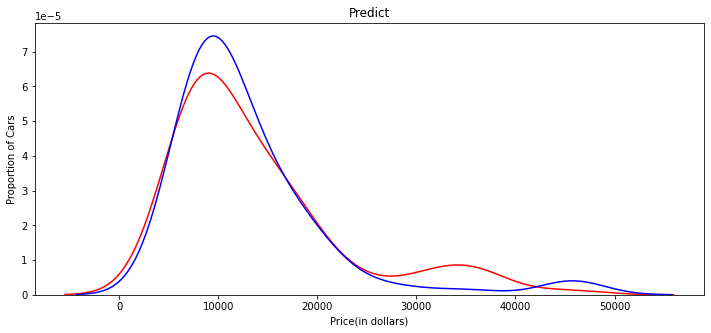

In [136]:
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)
yhat_test=poly1.predict(x_test_pr1)
DistributionPlot(y_test,yhat_test,'actual values','test values','Predict')

## Ridge Regression

In [137]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])

In [138]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=1)
RidgeModel.fit(x_train_pr,y_train)
yhat= RidgeModel.predict(x_test_pr)


In [139]:
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set: [ 6295. 10698. 13860. 13499.]


In [140]:
from tqdm import tqdm

Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
Alpha=10*np.array(range(0,1000))
pbar=tqdm(Alpha)

for alpha in pbar:
    RidgeModel=Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr,y_train)
    test_score,train_score=RidgeModel.score(x_test_pr,y_test),RidgeModel.score(x_train_pr,y_train)
    
    pbar.set_postfix({'Test Score':test_score,'Train Score': train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█| 1000/1000 [00:04<00:00, 202.56it/s, Test Score=0.564, Train Sco


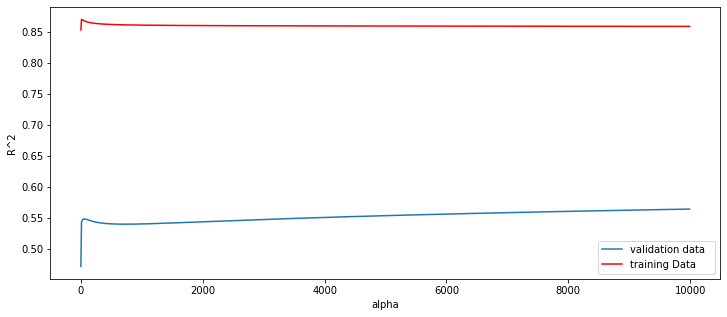

In [141]:
plt.figure(figsize=(12, 5))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## Grid Search

In [142]:
from sklearn.model_selection import GridSearchCV

parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]

RR=Ridge()

Grid1=GridSearchCV(RR,parameters1,cv=4)

Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [143]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [144]:
BestRR.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)

0.8411649831036152

In [145]:
scores=Grid1.cv_results_
scores['mean_test_score']

array([0.66459248, 0.66459305, 0.66459827, 0.66465008, 0.66513615,
       0.66808959, 0.67249168, 0.6569726 ])

In [146]:
# parameter2=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000],'normalize':[True,False]}]
# RR2=Ridge()
# Grid2=GridSearchCV(RR2,parameter2,cv=4)
# Grid2.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)
# Grid2.best_estimator_
# Scores=Grid2.cv_results_
# Scores